# Binary Classification with a Bank Churn

### План работы

1. Загрузка данных
2. Предварительный анализ
3. Выявление и обработка пропусков
4. Выявление и преобразование категориальных данных
5. Нормирование данных выбранным методом

### Загрузка данных

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
submission = pd.read_csv('sample_submission.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Предварительный анализ

#### Датафрейм Test

In [3]:
test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


In [5]:
test.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,110023.000000,1.100230e+05,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000
mean,220045.000000,1.569210e+07,656.530789,38.122205,4.996637,55333.611354,1.553321,0.753043,0.495233,112315.147765
std,31761.048671,7.168499e+04,80.315415,8.861550,2.806148,62788.519675,0.544714,0.431244,0.499980,50277.048244
min,165034.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,192539.500000,1.563286e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74440.325000
50%,220045.000000,1.569018e+07,660.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117832.230000
75%,247550.500000,1.575693e+07,710.000000,42.000000,7.000000,120145.605000,2.000000,1.000000,1.000000,154631.350000
max,275056.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000


#### Датафрейм Train 

In [6]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [8]:
train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


#### Датафрейм submission

In [9]:
submission.head()

,id,Exited
0,165034,0.5
1,165035,0.5
2,165036,0.5
3,165037,0.5
4,165038,0.5


In [10]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      110023 non-null  int64  
 1   Exited  110023 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.7 MB


In [11]:
submission.describe()

,id,Exited
count,110023.000000,110023.0
mean,220045.000000,0.5
std,31761.048671,0.0
min,165034.000000,0.5
25%,192539.500000,0.5
50%,220045.000000,0.5
75%,247550.500000,0.5
max,275056.000000,0.5


#### Вывод

Проведен предварительный анализ данных. Изучены типы и статистические показатели данных.

### Выявление и обработка пропусков

In [12]:
test.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [13]:
train.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Вывод

Пропусков нет.

### Выявление и преобразование категориальных данных

Необходимо преобразовать столбцы gender и geography.

Рассмотрим значения до кодировки

In [14]:
print(train['Geography'].unique())
print(train['Gender'].unique())
print(test['Geography'].unique())
print(test['Gender'].unique())

['France' 'Spain' 'Germany']
['Male' 'Female']
['France' 'Germany' 'Spain']
['Female' 'Male']


Закодируем значения

In [15]:
# Кодировка небулевых категориальных значений
label_encoder = LabelEncoder()
train['Geography'] = label_encoder.fit_transform(train['Geography'])
train['Gender'] = label_encoder.fit_transform(train['Gender'])
test['Geography'] = label_encoder.fit_transform(test['Geography'])
test['Gender'] = label_encoder.fit_transform(test['Gender'])

Рассмотрим значения после кодировки

In [16]:
print(train['Geography'].unique())
print(train['Gender'].unique())
print(test['Geography'].unique())
print(test['Gender'].unique())

[0 2 1]
[1 0]
[0 1 2]
[0 1]


Выбранные значения успешно закодированы

### Создание и оценка модели на основе подготовленных данных

#### Генерация новых признаков на основе существующих

1. Возрастная группа (AgeGroup) - распределим пользователей по группам (молодой возраст (1) - 18-44 лет, средний возраст (2) - 45-59 лет, пожилой возраст (3) - от 60 до 74 лет, старческий возраст (4) - от 75 лет).
2. Активный клиент с картой (IsActiveWithCard) - клиент является активным, а также имеет кредитную карту (1 или 0).
3. Лояльный клиент (Isloyal) - лояльными являются клиенты, у которых баланс > 0 и больше 1 продукта.
4. Средний количество продуктов за период (AvProdPerPeriod) - отношение Tenure и количества продуктов (длительность обслуживания клиента). 


In [17]:
datasets = [train, test]

for dataset in datasets:
    age_group = []
    for age in dataset['Age']:
        if age < 45:
            age_group.append(1)  # Молодой возраст
        elif 45 <= age < 60:
            age_group.append(2)  # Средний возраст
        elif 60 <= age < 75:
            age_group.append(3)  # Пожилой возраст
        else:
            age_group.append(4)  # Старческий возраст
    dataset['AgeGroup'] = age_group  
    
    
for dataset in datasets:
    # 1. IsActiveWithCard
    dataset['IsActiveWithCard'] = ((dataset['IsActiveMember'] == 1) & (dataset['HasCrCard'] == 1)).astype(int)
    
    # 2. IsLoyal
    dataset['IsLoyal'] = ((dataset['Balance'] > 0) & (dataset['NumOfProducts'] > 1)).astype(int)
    
    # 3. AvProdPerPeriod
    dataset['AvProdPerPeriod'] = dataset['Tenure'] / (dataset['NumOfProducts']) 

In [18]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup,IsActiveWithCard,IsLoyal,AvProdPerPeriod
0,0,15674932,Okwudilichukwu,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0,1,0,0,1.5
1,1,15749177,Okwudiliolisa,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0,1,1,0,0.5
2,2,15694510,Hsueh,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0,1,0,0,5.0
3,3,15741417,Kao,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1,1,0,2.0
4,4,15766172,Chiemenam,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0,1,1,0,2.5


In [19]:
test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,AgeGroup,IsActiveWithCard,IsLoyal,AvProdPerPeriod
0,165034,15773898,Lucchese,586,0,0,23.0,2,0.00,2,0.0,1.0,160976.75,1,0,0,1.0
1,165035,15782418,Nott,683,0,0,46.0,2,0.00,1,1.0,0.0,72549.27,2,0,0,2.0
2,165036,15807120,K?,656,0,0,34.0,7,0.00,2,1.0,0.0,138882.09,1,0,0,3.5
3,165037,15808905,O'Donnell,681,0,1,36.0,8,0.00,1,1.0,0.0,113931.57,1,0,0,8.0
4,165038,15607314,Higgins,752,1,1,38.0,10,121263.62,1,1.0,0.0,139431.00,1,0,0,10.0


Признаки успешно сгенерированы

### Отбор признаков

In [20]:
#target = 'Exited'  # Целевая переменная
features = train.drop(columns=['id', 'CustomerId', 'Surname', 'Exited'])  # Исключаем столбцы - идентификаторы
y = train['Exited']  # Целевая переменная

# Обучение модели случайного леса
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(features, y)

# Извлечение значимости признаков
importances = rf.feature_importances_
feature_names = features.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Сортировка признаков по значимости
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Отобранные признаки с их значимостью:")
print(feature_importance_df)

Отобранные признаки с их значимостью:
             Feature  Importance
3                Age    0.169375
9    EstimatedSalary    0.166232
0        CreditScore    0.157964
6      NumOfProducts    0.114071
5            Balance    0.108399
10          AgeGroup    0.073495
13   AvProdPerPeriod    0.052668
4             Tenure    0.042613
8     IsActiveMember    0.033749
1          Geography    0.031695
2             Gender    0.018607
11  IsActiveWithCard    0.016164
7          HasCrCard    0.009861
12           IsLoyal    0.005108


Отбираем ТОП-10 признаков

In [21]:
important_features = feature_importance_df['Feature'][:10]

important_features 

3                 Age
9     EstimatedSalary
0         CreditScore
6       NumOfProducts
5             Balance
10           AgeGroup
13    AvProdPerPeriod
4              Tenure
8      IsActiveMember
1           Geography
Name: Feature, dtype: object

Оставляем в выборке только значимые признаки

In [22]:
train = train.drop(columns=['Gender', 'IsActiveWithCard', 'HasCrCard', 'IsLoyal'])
test = test.drop(columns=['Gender', 'IsActiveWithCard', 'HasCrCard', 'IsLoyal'])

In [23]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,AgeGroup,AvProdPerPeriod
0,0,15674932,Okwudilichukwu,668,0,33.0,3,0.00,2,0.0,181449.97,0,1,1.5
1,1,15749177,Okwudiliolisa,627,0,33.0,1,0.00,2,1.0,49503.50,0,1,0.5
2,2,15694510,Hsueh,678,0,40.0,10,0.00,2,0.0,184866.69,0,1,5.0
3,3,15741417,Kao,581,0,34.0,2,148882.54,1,1.0,84560.88,0,1,2.0
4,4,15766172,Chiemenam,716,2,33.0,5,0.00,2,1.0,15068.83,0,1,2.5


In [24]:
test.head()

,id,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,AgeGroup,AvProdPerPeriod
0,165034,15773898,Lucchese,586,0,23.0,2,0.00,2,1.0,160976.75,1,1.0
1,165035,15782418,Nott,683,0,46.0,2,0.00,1,0.0,72549.27,2,2.0
2,165036,15807120,K?,656,0,34.0,7,0.00,2,0.0,138882.09,1,3.5
3,165037,15808905,O'Donnell,681,0,36.0,8,0.00,1,0.0,113931.57,1,8.0
4,165038,15607314,Higgins,752,1,38.0,10,121263.62,1,0.0,139431.00,1,10.0


Признаки отобраны

### Нормирование данных 

Рассмотрим статистическое описание тренировочной выборки

In [25]:
train.describe()

,id,CustomerId,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,AgeGroup,AvProdPerPeriod
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,0.648545,38.125888,5.020353,55478.086689,1.554455,0.497770,112574.822734,0.211599,1.221894,3.662846
std,47641.3565,7.139782e+04,80.103340,0.816574,8.867205,2.806159,62817.663278,0.547154,0.499997,50292.865585,0.408443,0.484790,2.517497
min,0.0000,1.556570e+07,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,11.580000,0.000000,1.000000,0.000000
25%,41258.2500,1.563314e+07,597.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.000000,74637.570000,0.000000,1.000000,1.666667
50%,82516.5000,1.569017e+07,659.000000,0.000000,37.000000,5.000000,0.000000,2.000000,0.000000,117948.000000,0.000000,1.000000,3.000000
75%,123774.7500,1.575682e+07,710.000000,1.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,155152.467500,0.000000,1.000000,5.000000
max,165033.0000,1.581569e+07,850.000000,2.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,199992.480000,1.000000,4.000000,10.000000


Рассмотрим статистическое описание тестовой выборки

In [26]:
test.describe()

,id,CustomerId,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,AgeGroup,AvProdPerPeriod
count,110023.000000,1.100230e+05,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000
mean,220045.000000,1.569210e+07,656.530789,0.643184,38.122205,4.996637,55333.611354,1.553321,0.495233,112315.147765,1.221245,3.641019
std,31761.048671,7.168499e+04,80.315415,0.814982,8.861550,2.806148,62788.519675,0.544714,0.499980,50277.048244,0.484836,2.509284
min,165034.000000,1.556570e+07,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,11.580000,1.000000,0.000000
25%,192539.500000,1.563286e+07,597.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.000000,74440.325000,1.000000,1.500000
50%,220045.000000,1.569018e+07,660.000000,0.000000,37.000000,5.000000,0.000000,2.000000,0.000000,117832.230000,1.000000,3.000000
75%,247550.500000,1.575693e+07,710.000000,1.000000,42.000000,7.000000,120145.605000,2.000000,1.000000,154631.350000,1.000000,5.000000
max,275056.000000,1.581569e+07,850.000000,2.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,199992.480000,4.000000,10.000000


**Необходимо нормировать следующие столбцы:**

- CreditScore - значения варьируются в диапазоне от 350 до 850
- Age - значения варьируются в диапазоне от 18 до 92.
- Balance - значения варьируются от 0 до 250,898. 50% перцентиль равен 0.
- EstimatedSalary - значения варьируются от 11 до 199,992.

Рассмотрим распределение выбранных признаков для тренировочной выборки

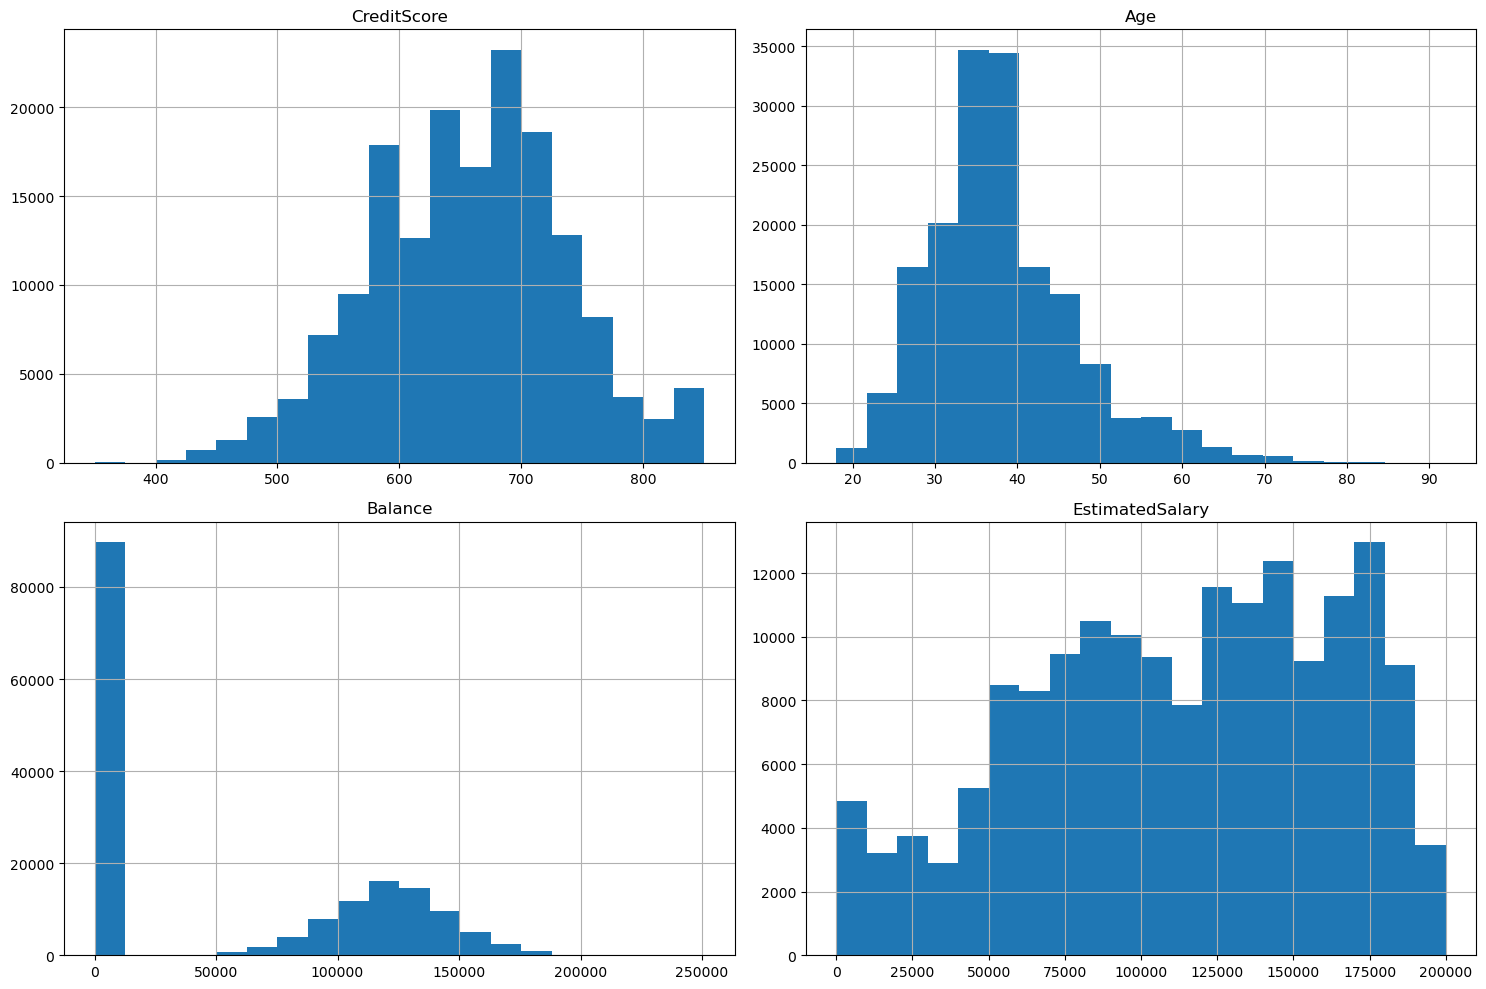

In [27]:
cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
train[cols].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()  

Рассмотрим распределение выбранных признаков для тестовой выборки

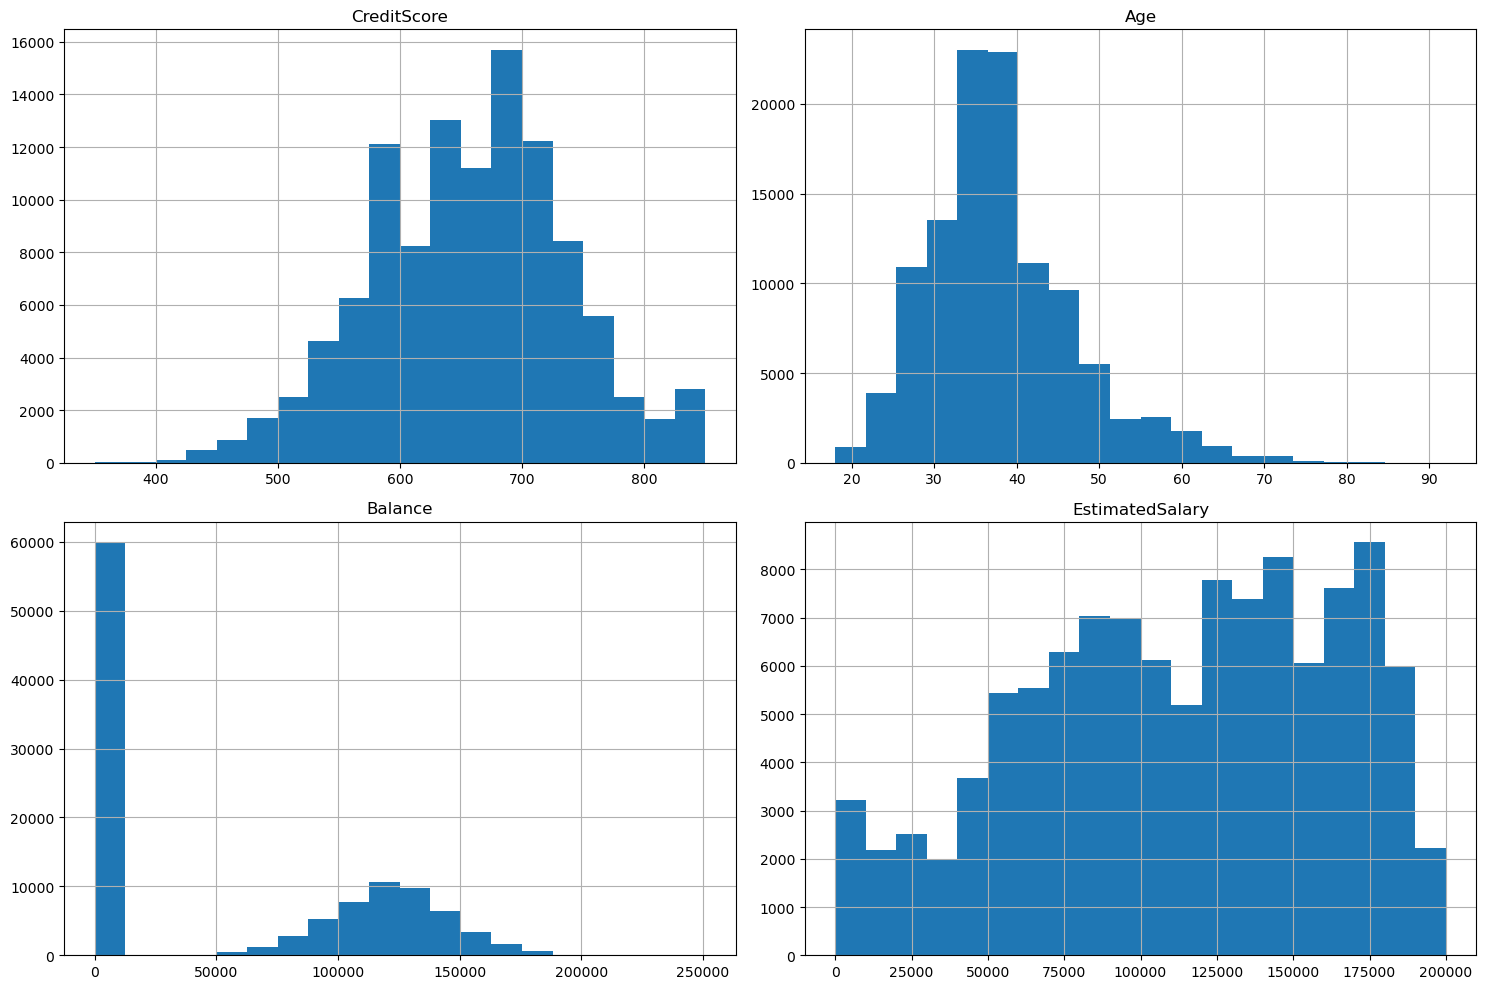

In [28]:
test[cols].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()  

**Метод нормализации:**

- CreditScore - распределение близко к нормальному, поэтому стоит выбрать Z-score нормализацию
- Balance - необходимо применить robust scaler, потому что он устойчив к выбросам.
- Age, EstimatedSalary - min-max нормализация

**Нормализация CreditScore**

In [29]:
scaler = MinMaxScaler()

train['CreditScore'] = scaler.fit_transform(train[['CreditScore']])

test['CreditScore'] = scaler.transform(test[['CreditScore']])

**Нормализация Age, EstimatedSalary**

In [30]:
scaler = MinMaxScaler()

cols = ['Age', 'EstimatedSalary']

train[cols] = scaler.fit_transform(train[cols])

test[cols] = scaler.transform(test[cols])

**Нормализация Balance**

In [31]:
scaler = RobustScaler()

train['Balance'] = scaler.fit_transform(train[['Balance']])

test['Balance'] = scaler.transform(test[['Balance']])

In [32]:
train.describe()

,id,CustomerId,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,AgeGroup,AvProdPerPeriod
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,0.612909,0.648545,0.271971,5.020353,0.462551,1.554455,0.497770,0.562870,0.211599,1.221894,3.662846
std,47641.3565,7.139782e+04,0.160207,0.816574,0.119827,2.806159,0.523745,0.547154,0.499997,0.251488,0.408443,0.484790,2.517497
min,0.0000,1.556570e+07,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,41258.2500,1.563314e+07,0.494000,0.000000,0.189189,3.000000,0.000000,1.000000,0.000000,0.373166,0.000000,1.000000,1.666667
50%,82516.5000,1.569017e+07,0.618000,0.000000,0.256757,5.000000,0.000000,2.000000,0.000000,0.589738,0.000000,1.000000,3.000000
75%,123774.7500,1.575682e+07,0.720000,1.000000,0.324324,7.000000,1.000000,2.000000,1.000000,0.775779,0.000000,1.000000,5.000000
max,165033.0000,1.581569e+07,1.000000,2.000000,1.000000,10.000000,2.091872,4.000000,1.000000,1.000000,1.000000,4.000000,10.000000


In [33]:
test.describe()

,id,CustomerId,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,AgeGroup,AvProdPerPeriod
count,110023.000000,1.100230e+05,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000
mean,220045.000000,1.569210e+07,0.613062,0.643184,0.271922,4.996637,0.461346,1.553321,0.495233,0.561571,1.221245,3.641019
std,31761.048671,7.168499e+04,0.160631,0.814982,0.119751,2.806148,0.523502,0.544714,0.499980,0.251409,0.484836,2.509284
min,165034.000000,1.556570e+07,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,192539.500000,1.563286e+07,0.494000,0.000000,0.189189,3.000000,0.000000,1.000000,0.000000,0.372179,1.000000,1.500000
50%,220045.000000,1.569018e+07,0.620000,0.000000,0.256757,5.000000,0.000000,2.000000,0.000000,0.589160,1.000000,3.000000
75%,247550.500000,1.575693e+07,0.720000,1.000000,0.324324,7.000000,1.001718,2.000000,1.000000,0.773173,1.000000,5.000000
max,275056.000000,1.581569e+07,1.000000,2.000000,1.000000,10.000000,2.091872,4.000000,1.000000,1.000000,4.000000,10.000000


Данные нормализованы